<a href="https://colab.research.google.com/github/hienngt/IST597_Fall2019_TF2.0/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import time

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Enable eager execution
tf.compat.v1.enable_eager_execution()

# Since i am using google collab so i will don't need to run tf.enable_eager_execution() but let's run it in case to test with other ENV
tf.executing_eagerly()

True

In [28]:
# Create Sample Data
NUM_SAMPLES = 500

In [38]:
# Define inputs and outputs with some noise
X = tf.random.normal(shape=(NUM_SAMPLES, 1))
noise = tf.random.normal(shape=(NUM_SAMPLES, 1))
Y = 2 * X + 1 + noise
print(f'Output of X and Y: {X[:6]}, {Y[:6]}')

Output of X and Y: [[ 0.9285903]
 [ 1.5738217]
 [-0.8634508]
 [-1.1802421]
 [-0.6039835]
 [ 1.0859442]], [[ 3.1165667 ]
 [ 3.5265033 ]
 [-2.0707073 ]
 [-1.4361492 ]
 [ 0.24193847]
 [ 0.5627084 ]]


In [31]:
# Create variables with initilize with random
W = tf.Variable(tf.random.normal(shape=(1, 1)))
print(f'Output of W: {W}')
b = tf.Variable(tf.random.normal(shape=(1, 1)))
print(f'Output of b: {b}')

Output of W: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.87703776]], dtype=float32)>
Output of b: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-1.4220972]], dtype=float32)>


In [69]:
train_steps = 1000
learning_rate = 0.01

In [39]:
# Define the linear predictor
def prediction(x):
    return W * x + b
print(f'First 5 Predictions: {prediction(X[:5]).numpy()}')

First 5 Predictions: [[-0.6076884 ]
 [-0.04179621]
 [-2.1793761 ]
 [-2.457214  ]
 [-1.9518136 ]]


In [45]:
# Mean Squared Error (MSE)
def squared_loss(y, y_predicted):
    return tf.reduce_mean(tf.square(y - y_predicted))
print(f'MSE: {squared_loss(Y, prediction(X)).numpy()}')

MSE: 8.074594497680664


In [46]:
# Huber Loss
def huber_loss(y, y_predicted, delta=1.0):
    residual = tf.abs(y - y_predicted)
    return tf.reduce_mean(
        tf.where(residual < delta, 0.5 * tf.square(residual), delta * (residual - 0.5 * delta))
    )
print(f'Huber Loss: {huber_loss(Y, prediction(X)).numpy()}')

Huber Loss: 2.0126466751098633


In [74]:
optimizer = tf.optimizers.SGD(learning_rate)

In [77]:
print(f'Optimizer: {optimizer.get_config()["name"]}, Learning Rate: {optimizer.get_config()["learning_rate"]}')

Optimizer: SGD, Learning Rate: 0.009999999776482582


In [61]:
# Training loop
for i in range(train_steps):
    with tf.GradientTape() as g:
        Y_pred = prediction(X)  # Get model prediction
        loss = huber_loss(Y, Y_pred)  # Compute loss

    # Compute gradients
    gradients = g.gradient(loss, [W, b])

    # Update weights
    optimizer.apply_gradients(zip(gradients, [W, b]))

    # Print progress
    if i % 100 == 0:
        print(f"Step {i}, Loss: {loss.numpy()}, W: {W.numpy()}, b: {b.numpy()}")

Step 0, Loss: 2.014686107635498, W: [[0.87639654]], b: [[-1.4152594]]
Step 100, Loss: 1.3185579776763916, W: [[1.0607728]], b: [[-0.6041163]]
Step 200, Loss: 0.8423803448677063, W: [[1.3126519]], b: [[0.03448007]]
Step 300, Loss: 0.581343412399292, W: [[1.5607675]], b: [[0.4756119]]
Step 400, Loss: 0.47472161054611206, W: [[1.7415487]], b: [[0.7415854]]
Step 500, Loss: 0.4399549961090088, W: [[1.8514616]], b: [[0.8877855]]
Step 600, Loss: 0.42953193187713623, W: [[1.9144106]], b: [[0.96565807]]
Step 700, Loss: 0.42640671133995056, W: [[1.9501837]], b: [[1.0072031]]
Step 800, Loss: 0.42547887563705444, W: [[1.9702556]], b: [[1.0293244]]
Step 900, Loss: 0.42520612478256226, W: [[1.9813998]], b: [[1.0410565]]


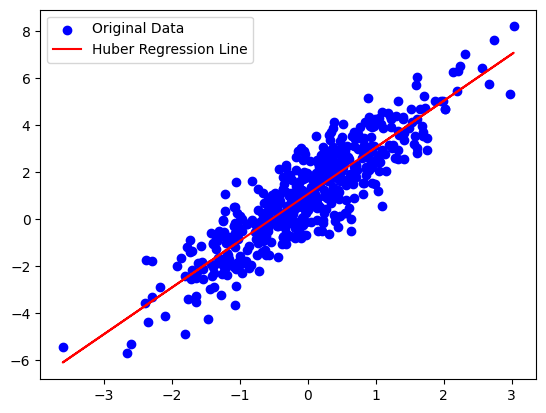

In [64]:
# Plot results
plt.scatter(X, Y, color="blue", label="Original Data")
plt.plot(X, prediction(X).numpy(), color="red", label="Huber Regression Line")
plt.legend()
plt.show()

In [78]:
# Change the loss function and which is the better one and why ?

# Store loss history for plotting
loss_history_mse = []
loss_history_mae = []
loss_history_huber = []

# Optimizer
optimizer = tf.optimizers.SGD(learning_rate)
print(f'Optimizer: {optimizer.get_config()["name"]}, Learning Rate: {optimizer.get_config()["learning_rate"]}')

Optimizer: SGD, Learning Rate: 0.009999999776482582


In [82]:
# Training loop
for i in range(train_steps):
    with tf.GradientTape() as g_mse, tf.GradientTape() as g_mae, tf.GradientTape() as g_huber:
        Y_pred_mse = prediction(X)
        Y_pred_mae = prediction(X)
        Y_pred_huber = prediction(X)

        loss_mse = squared_loss(Y, Y_pred_mse)
        loss_mae = absolute_loss(Y, Y_pred_mae)
        loss_huber = huber_loss(Y, Y_pred_huber)

    # Compute gradients
    gradients_mse = g_mse.gradient(loss_mse, [W, b])
    gradients_mae = g_mae.gradient(loss_mae, [W, b])
    gradients_huber = g_huber.gradient(loss_huber, [W, b])

    # Apply gradients
    optimizer.apply_gradients(zip(gradients_mse, [W, b]))
    optimizer.apply_gradients(zip(gradients_mae, [W, b]))
    optimizer.apply_gradients(zip(gradients_huber, [W, b]))

    # Store loss values
    loss_history_mse.append(loss_mse.numpy())
    loss_history_mae.append(loss_mae.numpy())
    loss_history_huber.append(loss_huber.numpy())

print(f'Loss History MSE: {loss_history_mse[:5]}')
print(f'Loss History MAE: {loss_history_mae[:5]}')
print(f'Loss History Huber: {loss_history_huber[:5]}')

Loss History MSE: [16.998869, 16.198238, 15.434891, 14.707309, 14.013695]
Loss History MAE: [3.2743812, 3.1957917, 3.119246, 3.0443864, 2.9711437]
Loss History Huber: [2.8048463, 2.727262, 2.6515303, 2.5776334, 2.5055242]


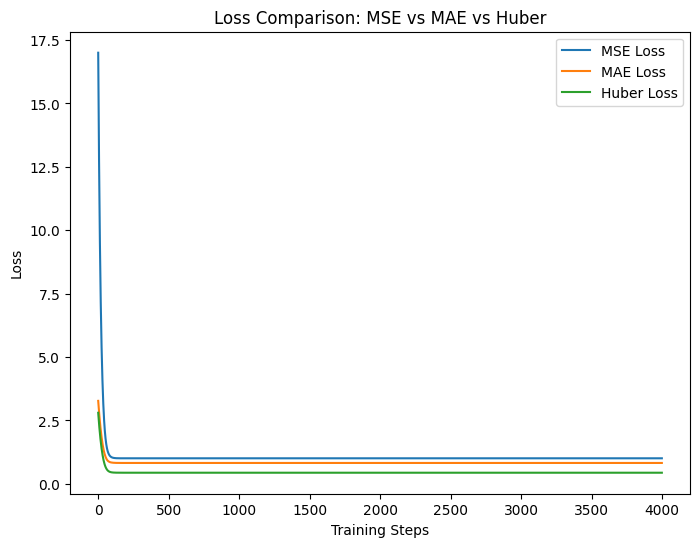

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(loss_history_mse, label="MSE Loss")
plt.plot(loss_history_mae, label="MAE Loss")
plt.plot(loss_history_huber, label="Huber Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Loss Comparison: MSE vs MAE vs Huber")
plt.legend()
plt.show()

According to the chart we have:
MSE (Blue Line)
- We start with highest inital loss.
- Coverage slowly but stable.
- More sensitive to outlier since it square the error.

MAE (Orage Line)
- starts lower than MSE.
- Coverage slightly faster than MSE.
- Less sensitive to ourlier but still be not the best one.

Huber Loss (Green Line)
- Has Lowest final loss.
- Coverage faster than MSE and MAE.
- More robust because it combines MSE for small errors and MAE with large errors.

- Which one is better?
=> Huber Loss is a best choice for this plot , it reaches the lowest final loss , more robust to outliers and converage faster than MSE and MAE